## Kaggle: Telco Customer Churn

### 1. Demographic:
 a. Which 2 demographics have proven to be the most popular with the telco brand
 
 b. If the marketing team wanted to increase customer retention, to whom should they target their advertisements?

### 2. Services:

 a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)

b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

### 3. Payment: (Use visualizations in explaing your analysis)
 a. If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
 
    i.   Basic
    ii.  Plus
    iii. Premium

 b. Should the company strictly go paperless for their monthly billings as a technique of keeping thier customers and why?

In [1]:
# Imports needed to complete the assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data into pandas dataframe
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Understand the dataset

In [3]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Find any null values
nan_df = churn[churn.isna().any(axis = 1)]
nan_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### 1 a) Demographics that are most popular with the telco brand

In [17]:
# Demographics include gender, age (senior citizens), marital status (partner), dependents
churn['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [18]:
churn['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [19]:
churn['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [20]:
churn['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [29]:
# Taking the most common demographics
churn.groupby(['gender', 'SeniorCitizen', 'Dependents', 'Churn'])['Churn'].count().unstack()

Churn                              No  Yes
gender SeniorCitizen Dependents           
Female 0             No          1391  543
                     Yes          830  156
       1             No           295  231
                     Yes           33    9
Male   0             No          1402  546
                     Yes          885  148
       1             No           302  223
                     Yes           36   13

### The most popular demographics are males that are not seniors and also don't have any dependents

### b. If the marketing team wanted to increase customer retention, to whom should they target their advertisements?

In [33]:
pd.DataFrame(churn.groupby(['gender', 'SeniorCitizen', 'Churn'])['Churn'].count())

Churn
gender SeniorCitizen Churn       
Female 0             No      2221
                     Yes      699
       1             No       328
                     Yes      240
Male   0             No      2287
                     Yes      694
       1             No       338
                     Yes      236

#### It appears that females that are not senior citizens have the highest churn at 699. Therefore, the marketing team should target them in order to increase customer retention

### 2 a) Services contributing to a higher monthly charge

In [50]:
churn.groupby(['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn'])['MonthlyCharges'].mean().unstack()

Churn                                                                                                                                                                          No  \
PhoneService MultipleLines    InternetService OnlineSecurity      OnlineBackup        DeviceProtection    TechSupport         StreamingTV         StreamingMovies                   
No           No phone service DSL             No                  No                  No                  No                  No                  No                    24.956667   
                                                                                                                                                  Yes                   34.780000   
                                                                                                                              Yes                 No                    35.210000   
                                                                                                                                                  Yes                   44.954545   
                                                                                                          Yes                 No                  No                    29.936667   
...                                                                                                                                                                           ...   
Yes          Yes              Fiber optic     Yes                 Yes                 Yes                 Yes                 No                  No                    95.086667   
                                                                                                                                                  Yes                  105.475000   
                                                                                                                              Yes                 No                   105.220000   
                                                                                                                                                  Yes                  115.027027   
                              No              No internet service No internet service No internet service No internet service No internet service No internet service   24.978163   

Churn                                                                                                                                                                         Yes  
PhoneService MultipleLines    InternetService OnlineSecurity      OnlineBackup        DeviceProtection    TechSupport         StreamingTV         StreamingMovies                  
No           No phone service DSL             No                  No                  No                  No                  No                  No                    24.835714  
                                                                                                                                                  Yes                   35.180769  
                                                                                                                              Yes                 No                    35.321429  
                                                                                                                                                  Yes                   45.210000  
                                                                                                          Yes                 No                  No                    29.950000  
...                                                                                                                                                                           ...  
Yes          Yes              Fiber optic     Yes                 Yes                 Yes                 Yes                 No                  No                    93.900000  
                          

In [51]:
churn.groupby(['PhoneService', 'Churn'])['MonthlyCharges'].mean().unstack()

Churn,No,Yes
PhoneService,,
No,43.520996,37.533824
Yes,63.213857,78.134255


In [52]:
churn.groupby(['MultipleLines', 'Churn'])['MonthlyCharges'].mean().unstack()

Churn,No,Yes
MultipleLines,,
No,49.855037,67.184452
No phone service,43.520996,37.533824
Yes,79.217987,89.071176


In [53]:
churn.groupby(['InternetService', 'Churn'])['MonthlyCharges'].mean().unstack()

Churn,No,Yes
InternetService,,
DSL,60.212105,49.083224
Fiber optic,93.932379,88.126484
No,21.136058,20.368142


In [54]:
churn.groupby(['OnlineSecurity', 'Churn'])['MonthlyCharges'].mean().unstack()

Churn,No,Yes
OnlineSecurity,,
No,74.625233,77.181896
No internet service,21.136058,20.368142
Yes,78.369432,81.581356


In [55]:
churn.groupby(['OnlineBackup', 'Churn'])['MonthlyCharges'].mean().unstack()

Churn,No,Yes
OnlineBackup,,
No,70.226792,74.512449
No internet service,21.136058,20.368142
Yes,82.292655,85.956788


In [56]:
churn.groupby(['DeviceProtection', 'Churn'])['MonthlyCharges'].mean().unstack()

Churn,No,Yes
DeviceProtection,,
No,68.873673,73.288398
No internet service,21.136058,20.368142
Yes,83.837240,88.214679


In [57]:
churn.groupby(['TechSupport', 'Churn'])['MonthlyCharges'].mean().unstack()

Churn,No,Yes
TechSupport,,
No,73.176986,76.562794
No internet service,21.136058,20.368142
Yes,80.040802,84.256290


In [58]:
churn.groupby(['StreamingTV', 'Churn'])['MonthlyCharges'].mean().unstack()

Churn,No,Yes
StreamingTV,,
No,64.547645,67.053503
No internet service,21.136058,20.368142
Yes,87.979662,90.497359


In [59]:
churn.groupby(['StreamingMovies', 'Churn'])['MonthlyCharges'].mean().unstack()

Churn,No,Yes
StreamingMovies,,
No,64.412859,67.445149
No internet service,21.136058,20.368142
Yes,87.852638,89.933619


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(-2.0, 0, '(Yes, Yes, No)'),
  Text(0.0, 0, '(No, No, No)'),
  Text(2.0, 0, '(No, No internet service, No internet service)'),
  Text(4.0, 0, '(No, Yes, Yes)'),
  Text(6.0, 0, '(No phone service, No, Yes)'),
  Text(8.0, 0, '(No phone service, Yes, Yes)'),
  Text(10.0, 0, '(Yes, No, Yes)'),
  Text(12.0, 0, '(Yes, Yes, No)'),
  Text(14.0, 0, '')])

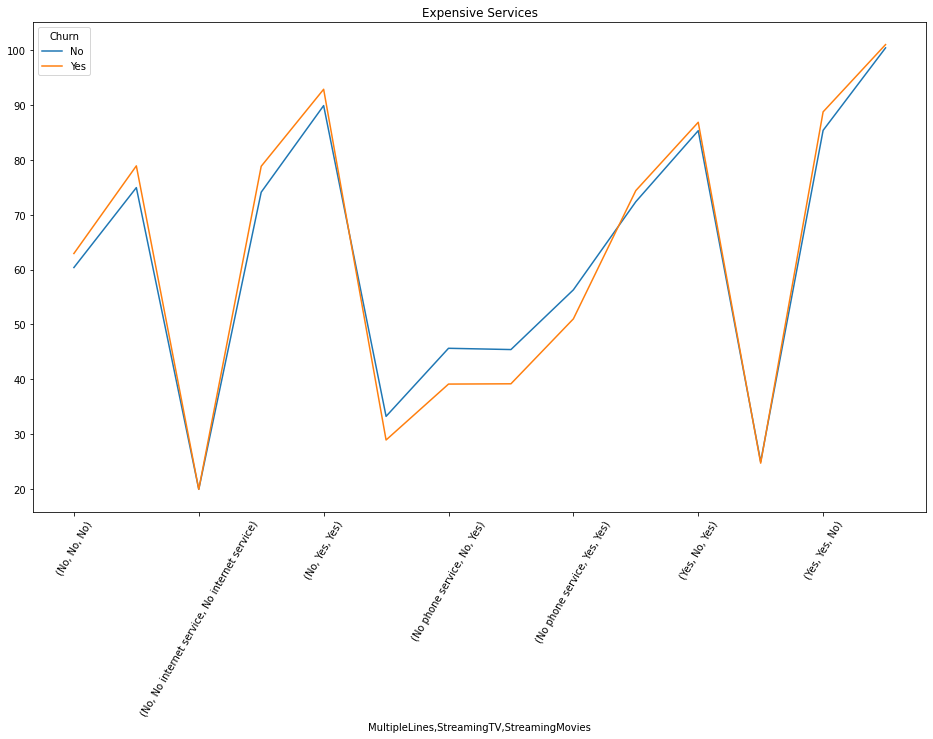

In [116]:
#Merging all the pivots above
#The 3 services that have  higher monthly charge are Multiplelines, StreamingTV and StreamingMovies
expensiveServices = churn.groupby(['MultipleLines', 'StreamingTV', 'StreamingMovies', 'Churn'])['MonthlyCharges'].mean().unstack()
expensiveServices.plot(figsize=(16, 9), title='Expensive Services');

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=60)

#### Looking at all the pivots as well as the graph above, the 3 services that had the highest average mothly charges leading to churning are MultipleLines (89.1), StreamingMovies (89.9) and StreamingTV (90.5) 

### 2b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

In [89]:
# churn vs phone vs contract
churn.groupby(['PhoneService', 'Contract', 'Churn'])['Churn'].count().unstack()

Churn                          No   Yes
PhoneService Contract                  
No           Month-to-month   223   153
             One year         131    14
             Two year         158     3
Yes          Month-to-month  1997  1502
             One year        1176   152
             Two year        1489    45

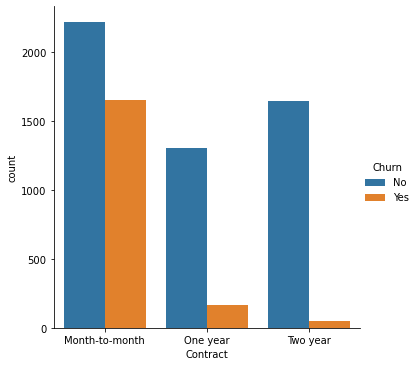

In [90]:
sns.catplot(x="Contract",hue="Churn", data=churn, kind="count")

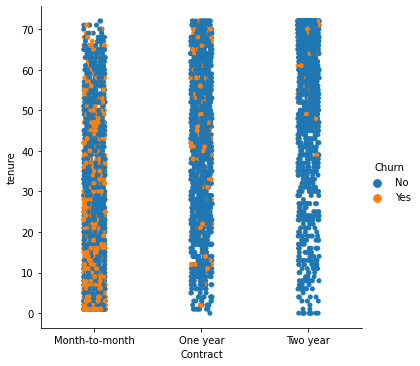

In [91]:
# Also tenure shows the time a customer has remained
# Tenure vs Contract
sns.catplot(x="Contract", y="tenure", hue="Churn", data=churn)

#### The two year contract would encourage customer retention

### Payment

In [98]:
#Get a dataframe where all customers didn't churn 
noChurn = churn[churn['Churn']== 'No']
noChurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


In [99]:
noChurn['MonthlyCharges'].describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

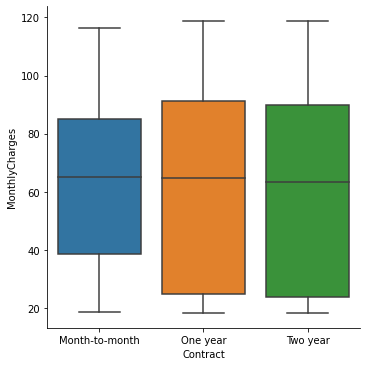

In [100]:
#Basic, Plus and Premium
sns.catplot(x="Contract", y="MonthlyCharges", data=noChurn, kind="box")

### If Telco streamlined its services into 3 bouquets, the monthly prices appropriate for Basic, Plus and Premium would be the 25th, 50th and 75th percentiles i.e. 25.10, 64.425 and 88.40 respectively

### Paperless or not

In [106]:
#Paperless vs Churn vs tenure
paperless = churn.groupby(['PaperlessBilling', 'Churn'])['tenure'].mean().unstack()
paperless

Churn,No,Yes
PaperlessBilling,,
No,35.420308,15.633262
Yes,39.434139,18.765000


<AxesSubplot:xlabel='PaperlessBilling'>

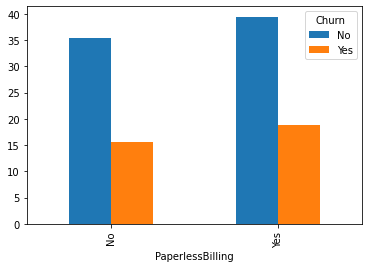

In [110]:
paperless.plot(kind = 'bar')

#### Yes, the company should go for paperless billings because when you compare the churn to the tenure, on average, customers who are billed electronically stay longer i.e. 39.4 vs 35.2 days for those that didn't churn and 18.8 vs 15.6 days for those that churned.